<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/Th%E1%BB%B1c_h%C3%A0nh_Data_Visualization_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Thực hành] Vẽ biểu đồ nâng cao với bộ dữ liệu Food Price in Turkey**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31021019/FoodPrice_in_Turkey.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


Loại bỏ dữ liệu bị khuyết

In [3]:
df = df.dropna()

# Vẽ biểu đồ xu hướng

Lọc dữ liệu sản phẩm gạo, vẽ biểu đồ xu hướng qua các năm

In [4]:
rice_df = df[df["ProductId"] == 52]

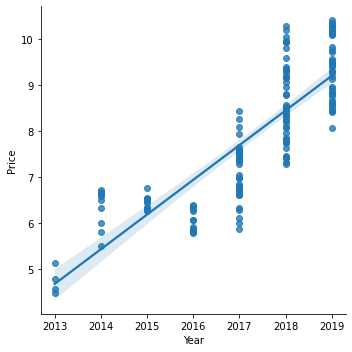

In [5]:
sns.lmplot(x="Year", y="Price",data = rice_df)

Có thể nhận thấy rằng giá gạo tăng dần qua các năm

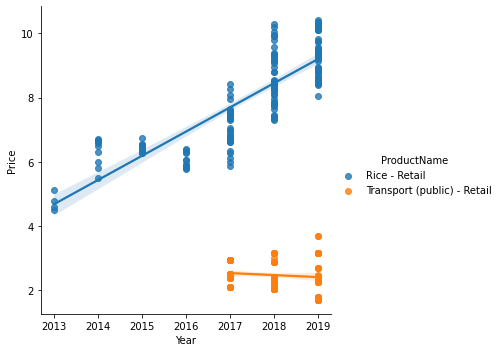

In [6]:
trans_df = df[(df["ProductName"] == "Transport (public) - Retail") | (df["ProductName"] == "Rice - Retail")]
sns.lmplot(x="Year", y="Price", hue="ProductName", data = trans_df)

có thể thấy rằng dù chi phí vận chuyển có xu hướng giảm, tuy nhiên giá gạo vẫn tăng khá mạnh, chứng tỏ không có sự liên quan giữa 2 thuộc tính này

# Vẽ biểu đồ phân bố

 Biểu đồ phân bố cho giá sản phẩm

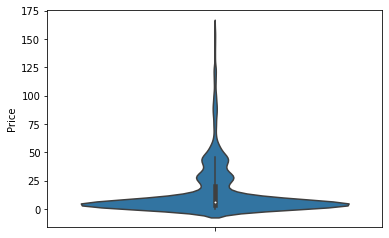

In [7]:
sns.violinplot(y = "Price", data=df)

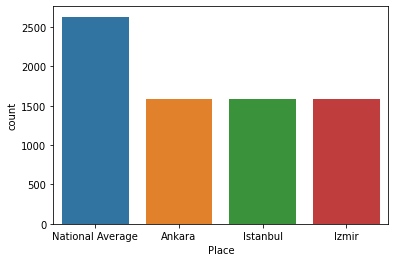

In [9]:
sns.countplot(data=df,x='Place')

Biểu đồ phân bố cho năm của sản phẩm

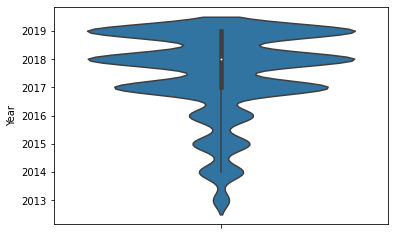

In [10]:
sns.violinplot(y = "Year", data=df)

# Vẽ biểu đồ tần số

vẽ biểu đồ tần số cho các sản phẩm theo năm

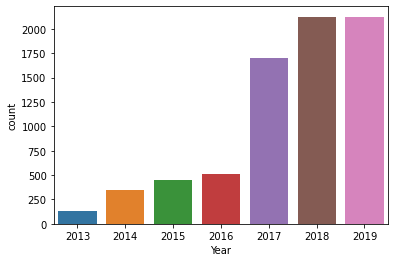

In [11]:
sns.countplot(x = "Year", data = df)

Thống kê sản phẩm theo địa điểm

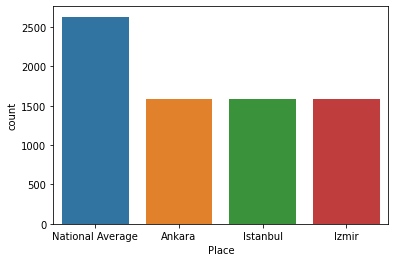

In [12]:
sns.countplot(x = "Place", data = df)

Hiển thị quan hệ giữa số lượng theo năm được nhím theo địa điểm

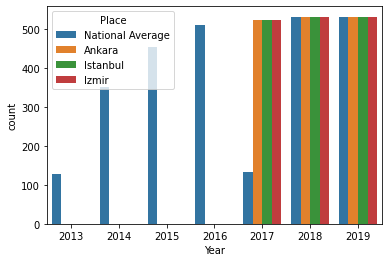

In [13]:
sns.countplot(x = "Year", hue = "Place", data = df)

# Vẽ biểu đồ box plot

Vẽ biểu đồ box plot cho thuộc tính giá sản phẩm

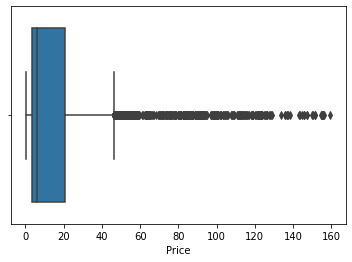

In [14]:
sns.boxplot(x=df["Price"])

Vẽ biểu đồ box plot giá sản phẩm phân bố theo năm



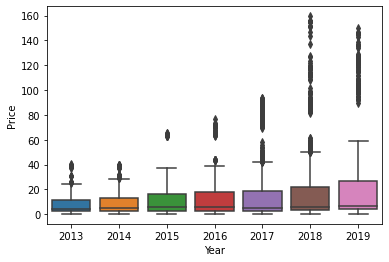

In [15]:
sns.boxplot(x = "Year", y = "Price", data=df)

# **[Thực hành] vẽ biểu đồ nâng cao với bộ dữ liệu Online Retail**

In [16]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31011319/OnlineRetail.csv", encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Loại bỏ dữ liệu bị khuyết

In [17]:
df = df.dropna()

Tính giá của mỗi mã sản phẩm ở các đơn hàngIn [24]:

In [18]:
df["Price"] = df["Quantity"] * df["UnitPrice"]

# Vẽ biểu đồ phân bố

Biểu đồ phân bố cho giá sản phẩm

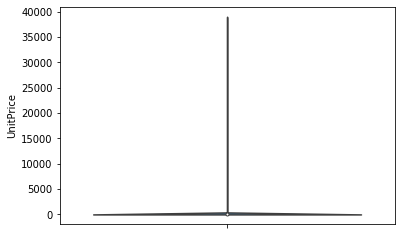

In [19]:
sns.violinplot(y = "UnitPrice", data=df)

Biểu đồ phân bố cho tổng giá mỗi sản phẩm ở các đơn

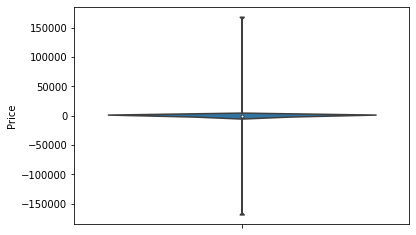

In [20]:
sns.violinplot(y = "Price", data=df)

Tính số lượng sản phẩm ở mỗi đơn hàng

In [21]:
df2 = df.groupby(['InvoiceNo'])['Quantity'].sum().reset_index()
df2.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


Biểu đồ phân bố số lượng sản phẩm trên mỗi đơn

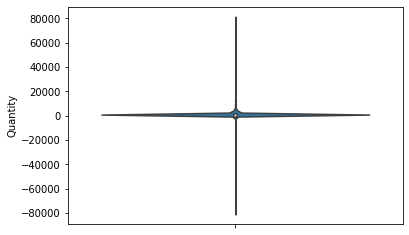

In [22]:
sns.violinplot(y="Quantity", data=df2)

Vẽ biểu đồ tần số

In [24]:
df3 = df.groupby(['Country'])['Quantity'].sum().reset_index()
df3.head()

,Country,Quantity
0,Australia,83653
1,Austria,4827
2,Bahrain,260
3,Belgium,23152
4,Brazil,356


Loại bỏ dữ liệu về hóa đơn trùng lặp

In [25]:
df1 = df.drop_duplicates(subset = 'InvoiceNo')

Vẽ biểu đồ tần số cho số hóa đơn theo quốc gia

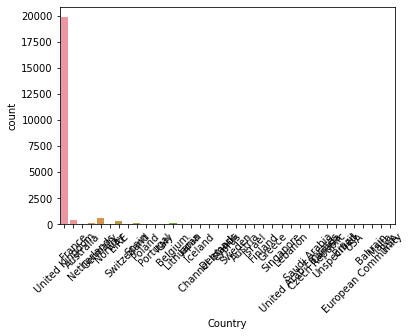

In [27]:
import matplotlib.pyplot as plt

plt.xticks(rotation=45)
sns.countplot(x = "Country", data = df1)

# Vẽ biểu đồ box plot

Vẽ biểu đồ box plot cho thuộc tính giá sản phẩm

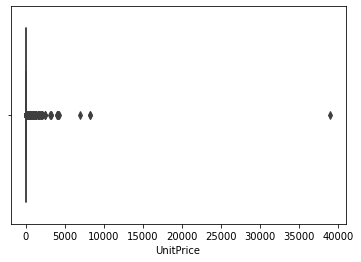

In [28]:
sns.boxplot(x=df["UnitPrice"])

Biểu đồ box plot cho số lượng sản phẩm mỗi đơn

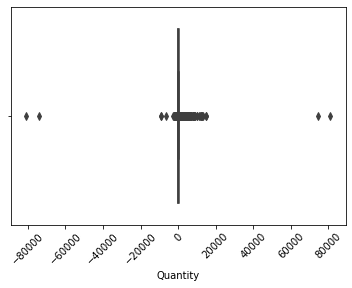

In [29]:
plt.xticks(rotation=45)
sns.boxplot(x=df2["Quantity"])

# **[Thực hành] vẽ biểu đồ nâng cao với bộ dữ liệu GDPlist**

In [30]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31020936/GDPlist.csv", encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


Loại bỏ dữ liệu bị khuyết

In [31]:
df = df.dropna()

# Vẽ biểu đồ phân bố

Biểu đồ phân bố giá trị GDP toàn cầu

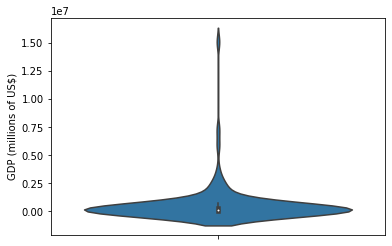

In [32]:
sns.violinplot(y=df["GDP (millions of US$)"])

Biểu đồ phân bố giá trị GDP châu Á

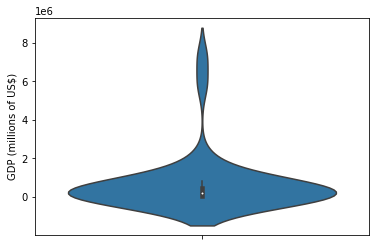

In [33]:
sns.violinplot(y=df[df["Continent"]=="Asia"]["GDP (millions of US$)"])

# Vẽ biểu đồ boxplot

Biểu đồ box plot nhóm theo châu lục

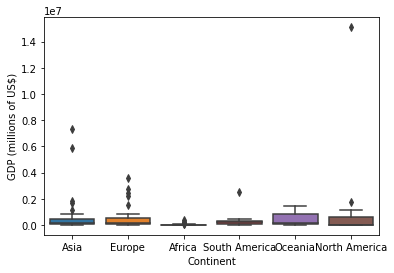

In [34]:
sns.boxplot(x="Continent", y = "GDP (millions of US$)", data=df)
